In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
#data sets
#"C:\Users\ladwa\Desktop\hr_analysis_project\Attendance_200.csv"
#['Emp_ID', 'Name', 'Dept_ID', 'Joining_Date', 'Experience_Years']
#"C:\Users\ladwa\Desktop\hr_analysis_project\Departments_200.csv" [Dept_ID', 'Dept_Name]
#"C:\Users\ladwa\Desktop\hr_analysis_project\Employees_200.csv"
#['Emp_ID', 'Month', 'Days_Present', 'Total_Working_Days']
#"C:\Users\ladwa\Desktop\hr_analysis_project\Salaries_200.csv"  ['Emp_ID', 'Salary']

In [6]:
df_emp=pd.read_csv(r"C:\Users\ladwa\Desktop\hr_analysis_project\Employees_200.csv")

In [7]:
df_dep=pd.read_csv(r"C:\Users\ladwa\Desktop\hr_analysis_project\Departments_200.csv")

In [8]:
df_att=pd.read_csv(r"C:\Users\ladwa\Desktop\hr_analysis_project\Attendance_200.csv")

In [9]:
df_sal=pd.read_csv(r"C:\Users\ladwa\Desktop\hr_analysis_project\Salaries_200.csv")

In [10]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Emp_ID            200 non-null    int64 
 1   Name              200 non-null    object
 2   Dept_ID           200 non-null    int64 
 3   Joining_Date      200 non-null    object
 4   Experience_Years  200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [11]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Dept_ID    4 non-null      int64 
 1   Dept_Name  4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [12]:
df_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Emp_ID              200 non-null    int64 
 1   Month               200 non-null    object
 2   Days_Present        200 non-null    int64 
 3   Total_Working_Days  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [13]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Emp_ID  200 non-null    int64
 1   Salary  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [14]:
df_emp.head()

,Emp_ID,Name,Dept_ID,Joining_Date,Experience_Years
0,101,Allison Hill,1,2018-10-18,7
1,102,Brian Yang,1,2024-04-11,1
2,103,Javier Johnson,3,2018-09-20,7
3,104,Lance Hoffman,2,2024-04-09,1
4,105,Jerry Ramirez,2,2015-02-10,10


In [15]:
df_emp.duplicated().sum()

0

In [16]:
df_dep.head()

,Dept_ID,Dept_Name
0,1,HR
1,2,IT
2,3,Finance
3,4,Marketing


In [17]:
df_dep.shape

(4, 2)

In [18]:
df_att.head()

,Emp_ID,Month,Days_Present,Total_Working_Days
0,101,2025-09,22,22
1,102,2025-09,21,22
2,103,2025-09,22,22
3,104,2025-09,20,22
4,105,2025-09,18,22


In [19]:
df_sal.head()

,Emp_ID,Salary
0,101,36630
1,102,115477
2,103,100855
3,104,31934
4,105,42224


In [20]:
df_emp.shape

(200, 5)

In [21]:
#Count the total number of employees.
df_emp.nunique()

Emp_ID              200
Name                200
Dept_ID               4
Joining_Date        196
Experience_Years     11
dtype: int64

In [22]:
#Count the total number of employees.
df_emp["Emp_ID"].nunique()

200

In [23]:
#Find the average salary of all employees.
df_1=pd.merge(df_emp,df_sal,on="Emp_ID")

In [24]:
df_1

,Emp_ID,Name,Dept_ID,Joining_Date,Experience_Years,Salary
0,101,Allison Hill,1,2018-10-18,7,36630
1,102,Brian Yang,1,2024-04-11,1,115477
2,103,Javier Johnson,3,2018-09-20,7,100855
3,104,Lance Hoffman,2,2024-04-09,1,31934
4,105,Jerry Ramirez,2,2015-02-10,10,42224
...,...,...,...,...,...,...
195,296,Gary Santiago,4,2017-09-26,8,66517
196,297,Michael Roberts,2,2021-10-24,4,39099
197,298,Krista Gibson,1,2020-05-08,5,66585
198,299,Brian Barton,4,2023-10-03,2,76025


In [25]:
df_1.groupby("Emp_ID")["Salary"].mean()

Emp_ID
101     36630.0
102    115477.0
103    100855.0
104     31934.0
105     42224.0
         ...   
296     66517.0
297     39099.0
298     66585.0
299     76025.0
300    114080.0
Name: Salary, Length: 200, dtype: float64

In [26]:
df_1["Salary"].mean()

72516.395

In [27]:
#List all departments with the number of employees in each
df_2=pd.merge(df_emp,df_dep,on="Dept_ID",how="outer")
df_2["Dept_Name"].value_counts()

Dept_Name
IT           57
HR           56
Marketing    44
Finance      43
Name: count, dtype: int64

In [28]:
#Find the lowest salary.
min_sal=df_sal["Salary"].min()
print(f"the minimum salary is {min_sal}")

the minimum salary is 30282


In [29]:
#highest salary
max_sal=df_sal["Salary"].max()
print(f"the maximum salary is {max_sal}")

the maximum salary is 119399


In [30]:
#Find employees with perfect attendance (Days_Present = Total_Working_Days).
df=df_att[df_att["Days_Present"]==df_att["Total_Working_Days"]]
len(df)

42

In [31]:
df_att.head()

,Emp_ID,Month,Days_Present,Total_Working_Days
0,101,2025-09,22,22
1,102,2025-09,21,22
2,103,2025-09,22,22
3,104,2025-09,20,22
4,105,2025-09,18,22


In [32]:
#Count employees per department
df_2=pd.merge(df_emp,df_dep,on="Dept_ID",how="outer")
df_2["Dept_Name"].value_counts()

Dept_Name
IT           57
HR           56
Marketing    44
Finance      43
Name: count, dtype: int64

In [33]:
#List employees who joined after 2020.
df_emp["Joining_Date"]=pd.to_datetime(df_emp["Joining_Date"])
df_emp["year"]=df_emp["Joining_Date"].dt.year

In [34]:
df_emp.head()

,Emp_ID,Name,Dept_ID,Joining_Date,Experience_Years,year
0,101,Allison Hill,1,2018-10-18,7,2018
1,102,Brian Yang,1,2024-04-11,1,2024
2,103,Javier Johnson,3,2018-09-20,7,2018
3,104,Lance Hoffman,2,2024-04-09,1,2024
4,105,Jerry Ramirez,2,2015-02-10,10,2015


In [35]:
new_join=df_emp[df_emp["year"]>2020]
len(new_join)

77

In [36]:
from datetime import datetime

In [37]:
#Find average salary per department.
df_3=pd.merge(df_1,df_dep,on="Dept_ID",how="outer")
df_3.groupby("Dept_Name")["Salary"].mean()

Dept_Name
Finance      73291.511628
HR           75136.928571
IT           68027.701754
Marketing    74238.568182
Name: Salary, dtype: float64

In [38]:
#List employees with more than 3 years of experience.
df_emp[df_emp["Experience_Years"]>3]

,Emp_ID,Name,Dept_ID,Joining_Date,Experience_Years,year
0,101,Allison Hill,1,2018-10-18,7,2018
2,103,Javier Johnson,3,2018-09-20,7,2018
4,105,Jerry Ramirez,2,2015-02-10,10,2015
5,106,Caitlin Henderson,2,2019-09-23,6,2019
6,107,Tyler Rogers,1,2016-07-30,9,2016
...,...,...,...,...,...,...
189,290,Morgan Munoz,2,2015-06-10,10,2015
191,292,Alicia Hubbard,2,2019-08-02,6,2019
195,296,Gary Santiago,4,2017-09-26,8,2017
196,297,Michael Roberts,2,2021-10-24,4,2021


In [39]:
#Identify employees eligible for promotion (Experience ≥ 3 years & Salary < 60000).
df_1[(df_1["Experience_Years"]>=3)&(df_1["Salary"]<60000)]

,Emp_ID,Name,Dept_ID,Joining_Date,Experience_Years,Salary
0,101,Allison Hill,1,2018-10-18,7,36630
4,105,Jerry Ramirez,2,2015-02-10,10,42224
6,107,Tyler Rogers,1,2016-07-30,9,51798
10,111,Michele Williams,1,2018-11-17,7,58016
12,113,Jesse Flowers,2,2017-10-07,8,37685
13,114,Daniel Adams,2,2016-03-19,9,51579
24,125,Jennifer Brown,3,2021-06-29,4,50289
27,128,Patricia Peterson,3,2019-12-29,6,58534
28,129,Jesse Mckay,1,2019-06-25,6,37665
33,134,Sherry Decker,3,2020-03-25,5,37492


In [40]:
#Find the top 5 highest-paid employees.
df_1.sort_values(ascending=False,by="Salary").head(5)

,Emp_ID,Name,Dept_ID,Joining_Date,Experience_Years,Salary
158,259,Nathan Freeman,1,2019-02-02,6,119399
47,148,Scott Brown,1,2016-09-03,9,118501
72,173,Brandy Wilson,4,2016-10-27,9,118039
175,276,Lisa Gibbs,1,2018-11-03,7,117806
66,167,Timothy Walls,2,2015-02-27,10,117782


In [41]:
df_att.head()

,Emp_ID,Month,Days_Present,Total_Working_Days
0,101,2025-09,22,22
1,102,2025-09,21,22
2,103,2025-09,22,22
3,104,2025-09,20,22
4,105,2025-09,18,22


In [42]:
#Calculate the attendance percentage of each employee.
df_att["att_per"]=(df_att["Days_Present"]/df_att["Total_Working_Days"])*100
df_att[["Emp_ID","att_per"]]

,Emp_ID,att_per
0,101,100.000000
1,102,95.454545
2,103,100.000000
3,104,90.909091
4,105,81.818182
...,...,...
195,296,90.909091
196,297,95.454545
197,298,90.909091
198,299,86.363636


In [43]:
df_att.columns

Index(['Emp_ID', 'Month', 'Days_Present', 'Total_Working_Days', 'att_per'], dtype='object')

In [44]:
#Find employees whose salary is above the company average.
average_sal=df_sal["Salary"].mean()
print(average_sal)

72516.395


In [45]:
df_1[df_1["Salary"]>average_sal]

,Emp_ID,Name,Dept_ID,Joining_Date,Experience_Years,Salary
1,102,Brian Yang,1,2024-04-11,1,115477
2,103,Javier Johnson,3,2018-09-20,7,100855
7,108,Ian Cooper,1,2019-07-02,6,83269
8,109,Monica Herrera,4,2021-06-10,4,93653
9,110,Edward Fuller,1,2021-02-25,4,93092
...,...,...,...,...,...,...
191,292,Alicia Hubbard,2,2019-08-02,6,116511
193,294,Sydney White,2,2024-12-16,1,82227
194,295,Robert Costa,3,2022-12-30,3,73025
198,299,Brian Barton,4,2023-10-03,2,76025


In [46]:
#List employees in IT or HR departments.
df_3[(df_3["Dept_Name"]=="IT")|(df_3["Dept_Name"]=="HR")]

,Emp_ID,Name,Dept_ID,Joining_Date,Experience_Years,Salary,Dept_Name
0,101,Allison Hill,1,2018-10-18,7,36630,HR
1,102,Brian Yang,1,2024-04-11,1,115477,HR
2,107,Tyler Rogers,1,2016-07-30,9,51798,HR
3,108,Ian Cooper,1,2019-07-02,6,83269,HR
4,110,Edward Fuller,1,2021-02-25,4,93092,HR
...,...,...,...,...,...,...,...
108,289,Katherine Miller,2,2015-09-05,10,59831,IT
109,290,Morgan Munoz,2,2015-06-10,10,59219,IT
110,292,Alicia Hubbard,2,2019-08-02,6,116511,IT
111,294,Sydney White,2,2024-12-16,1,82227,IT


In [47]:
#Find departments with average salary above 70000.
df_4=df_3.groupby("Dept_Name")["Salary"].mean().reset_index()
df_4

,Dept_Name,Salary
0,Finance,73291.511628
1,HR,75136.928571
2,IT,68027.701754
3,Marketing,74238.568182


In [48]:
df_4[df_4["Salary"]>70000]

,Dept_Name,Salary
0,Finance,73291.511628
1,HR,75136.928571
3,Marketing,74238.568182


In [49]:
df_3.head(2)

,Emp_ID,Name,Dept_ID,Joining_Date,Experience_Years,Salary,Dept_Name
0,101,Allison Hill,1,2018-10-18,7,36630,HR
1,102,Brian Yang,1,2024-04-11,1,115477,HR


In [50]:
#Identify employees whose salary is below the average salary of their department.
below_avg=df_3.groupby("Dept_Name")["Salary"].transform("mean")
avg_sal_dep=df_3[df_3["Salary"]<below_avg]
avg_sal_dep[["Name","Dept_Name","Salary"]]

,Name,Dept_Name,Salary
0,Allison Hill,HR,36630
2,Tyler Rogers,HR,51798
5,Michele Williams,HR,58016
9,Jesse Mckay,HR,37665
11,James Martin,HR,37989
...,...,...,...
193,Deborah Miller,Marketing,44168
195,Joshua Holland,Marketing,56158
196,Vernon Huff,Marketing,33101
197,Pamela Thompson,Marketing,55313


In [51]:
#Find employees with the same salary.
df_3[df_3.duplicated(subset="Salary",keep=False)]

,Emp_ID,Name,Dept_ID,Joining_Date,Experience_Years,Salary,Dept_Name
62,118,Andrew Stewart,2,2019-07-22,6,64760,IT
172,188,Sharon Cochran,4,2019-07-16,6,64760,Marketing


In [52]:
#Identify employees with experience ≥ 5 years and salary < 60000.
df_3[(df_3["Experience_Years"]>=5)&(df_3["Salary"]<60000)].sort_values(by="Salary",ascending=False)

,Emp_ID,Name,Dept_ID,Joining_Date,Experience_Years,Salary,Dept_Name
108,289,Katherine Miller,2,2015-09-05,10,59831,IT
109,290,Morgan Munoz,2,2015-06-10,10,59219,IT
52,284,Rachel Weber,1,2018-05-14,7,59154,HR
117,128,Patricia Peterson,3,2019-12-29,6,58534,Finance
5,111,Michele Williams,1,2018-11-17,7,58016,HR
135,186,Rita Keith,3,2015-06-04,10,57938,Finance
43,258,Desiree Smith,1,2018-04-02,7,57535,HR
129,166,James Powers,3,2020-02-08,5,56772,Finance
195,285,Joshua Holland,4,2019-07-09,6,56158,Marketing
2,107,Tyler Rogers,1,2016-07-30,9,51798,HR


In [53]:
#Find employees with maximum attendance in each department.
df_att.head()

,Emp_ID,Month,Days_Present,Total_Working_Days,att_per
0,101,2025-09,22,22,100.000000
1,102,2025-09,21,22,95.454545
2,103,2025-09,22,22,100.000000
3,104,2025-09,20,22,90.909091
4,105,2025-09,18,22,81.818182


In [54]:
df_4=pd.merge(df_att,df_3,on="Emp_ID")

In [55]:
df_4.head()

,Emp_ID,Month,Days_Present,Total_Working_Days,att_per,Name,Dept_ID,Joining_Date,Experience_Years,Salary,Dept_Name
0,101,2025-09,22,22,100.000000,Allison Hill,1,2018-10-18,7,36630,HR
1,102,2025-09,21,22,95.454545,Brian Yang,1,2024-04-11,1,115477,HR
2,103,2025-09,22,22,100.000000,Javier Johnson,3,2018-09-20,7,100855,Finance
3,104,2025-09,20,22,90.909091,Lance Hoffman,2,2024-04-09,1,31934,IT
4,105,2025-09,18,22,81.818182,Jerry Ramirez,2,2015-02-10,10,42224,IT


In [56]:
##Find employees with maximum attendance in each department.
df_5=df_4.loc[df_4.groupby("Dept_Name")["Days_Present"].idxmax()]
df_5

,Emp_ID,Month,Days_Present,Total_Working_Days,att_per,Name,Dept_ID,Joining_Date,Experience_Years,Salary,Dept_Name
2,103,2025-09,22,22,100.0,Javier Johnson,3,2018-09-20,7,100855,Finance
0,101,2025-09,22,22,100.0,Allison Hill,1,2018-10-18,7,36630,HR
12,113,2025-09,22,22,100.0,Jesse Flowers,2,2017-10-07,8,37685,IT
8,109,2025-09,22,22,100.0,Monica Herrera,4,2021-06-10,4,93653,Marketing


In [57]:
#Calculate total salary expense per department.
df_4.groupby("Dept_Name")["Salary"].sum()

Dept_Name
Finance      3151535
HR           4207668
IT           3877579
Marketing    3266497
Name: Salary, dtype: int64

In [58]:
#List employees who never had perfet attendance.
df_4.sort_values(by="Days_Present",ascending=True).head(5)

,Emp_ID,Month,Days_Present,Total_Working_Days,att_per,Name,Dept_ID,Joining_Date,Experience_Years,Salary,Dept_Name
97,198,2025-09,18,22,81.818182,Andrew Graham,4,2023-11-05,2,69651,Marketing
55,156,2025-09,18,22,81.818182,Mrs. Rachel Gibson,3,2022-03-13,3,35209,Finance
106,207,2025-09,18,22,81.818182,Michael Dixon,3,2017-11-20,8,43577,Finance
36,137,2025-09,18,22,81.818182,Betty Alvarez,4,2024-05-09,1,92493,Marketing
86,187,2025-09,18,22,81.818182,Tim Patton,4,2022-01-02,3,96307,Marketing


In [59]:
df_emp.head()

,Emp_ID,Name,Dept_ID,Joining_Date,Experience_Years,year
0,101,Allison Hill,1,2018-10-18,7,2018
1,102,Brian Yang,1,2024-04-11,1,2024
2,103,Javier Johnson,3,2018-09-20,7,2018
3,104,Lance Hoffman,2,2024-04-09,1,2024
4,105,Jerry Ramirez,2,2015-02-10,10,2015


In [60]:
#Find employees who joined in the last 3 years.
df_emp[df_emp["year"]>=2023]

,Emp_ID,Name,Dept_ID,Joining_Date,Experience_Years,year
1,102,Brian Yang,1,2024-04-11,1,2024
3,104,Lance Hoffman,2,2024-04-09,1,2024
15,116,Devin Schaefer,2,2024-06-22,1,2024
20,121,Charles Mcgee,1,2024-03-03,1,2024
22,123,Zachary Taylor,4,2023-05-25,2,2023
25,126,Julie King,2,2024-05-30,1,2024
26,127,Alexandra Le,2,2024-02-19,1,2024
30,131,Elizabeth Fowler,4,2025-05-12,0,2025
31,132,James Martin,1,2024-01-09,1,2024
35,136,John Jones,1,2024-01-24,1,2024


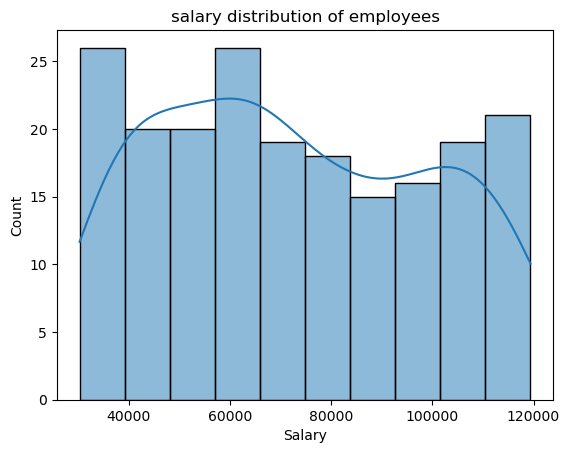

In [64]:
#Visualize the distribution of salaries using a histogram.
sns.histplot(df_sal["Salary"],bins=10, kde=True)
plt.title("salary distribution of employees")
plt.show()

In [73]:
#Create a bar chart showing total employees per department.
df_new=df_4["Dept_Name"].value_counts().reset_index()
df_new.columns=["Dept_Name","Total_emp"]
df_new

,Dept_Name,Total_emp
0,IT,57
1,HR,56
2,Marketing,44
3,Finance,43


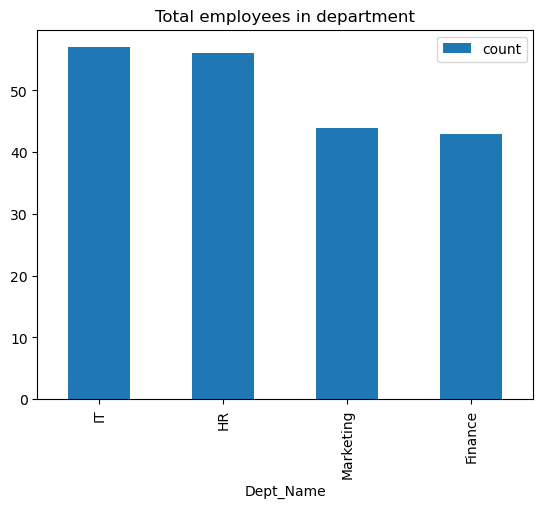

In [68]:
df_new.plot(x="Dept_Name",y="count",kind="bar",title="Total employees in department")
plt.show()

In [69]:
df_4.head()

,Emp_ID,Month,Days_Present,Total_Working_Days,att_per,Name,Dept_ID,Joining_Date,Experience_Years,Salary,Dept_Name
0,101,2025-09,22,22,100.000000,Allison Hill,1,2018-10-18,7,36630,HR
1,102,2025-09,21,22,95.454545,Brian Yang,1,2024-04-11,1,115477,HR
2,103,2025-09,22,22,100.000000,Javier Johnson,3,2018-09-20,7,100855,Finance
3,104,2025-09,20,22,90.909091,Lance Hoffman,2,2024-04-09,1,31934,IT
4,105,2025-09,18,22,81.818182,Jerry Ramirez,2,2015-02-10,10,42224,IT


In [70]:
#Analyze attendance trends: average attendance per department.
df_attendence=df_4.groupby("Dept_Name")["Days_Present"].mean().reset_index()

In [72]:
df_attendence.columns=["Department_Name","Ave_Attendence"]
df_attendence

,Department_Name,Ave_Attendence
0,Finance,20.069767
1,HR,20.250000
2,IT,20.245614
3,Marketing,20.227273
